<a href="https://colab.research.google.com/github/leman-cap13/DL_projects/blob/main/Fashion_MNIST_%3E_TensorFlow_%7C_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow

#Download dataset

In [ ]:
import tensorflow as tf

(x_full, y_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x_full,y_full,test_size=0.2,random_state=13)

In [ ]:
print(f"Train shape: {X_train.shape}, Test shape: {x_test.shape}, Validation shape: {X_valid.shape}")

Train shape: (48000, 28, 28), Test shape: (10000, 28, 28), Validation shape: (12000, 28, 28)


In [ ]:
print(y_train[:10])

[1 3 8 9 4 0 3 2 3 5]


In [ ]:
import numpy as np

unique_classes = np.unique(y_train)
print(unique_classes)
print(f"Total  class count is {len(unique_classes)} .")


[0 1 2 3 4 5 6 7 8 9]
Total  class count is 10 .


#Visualize dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

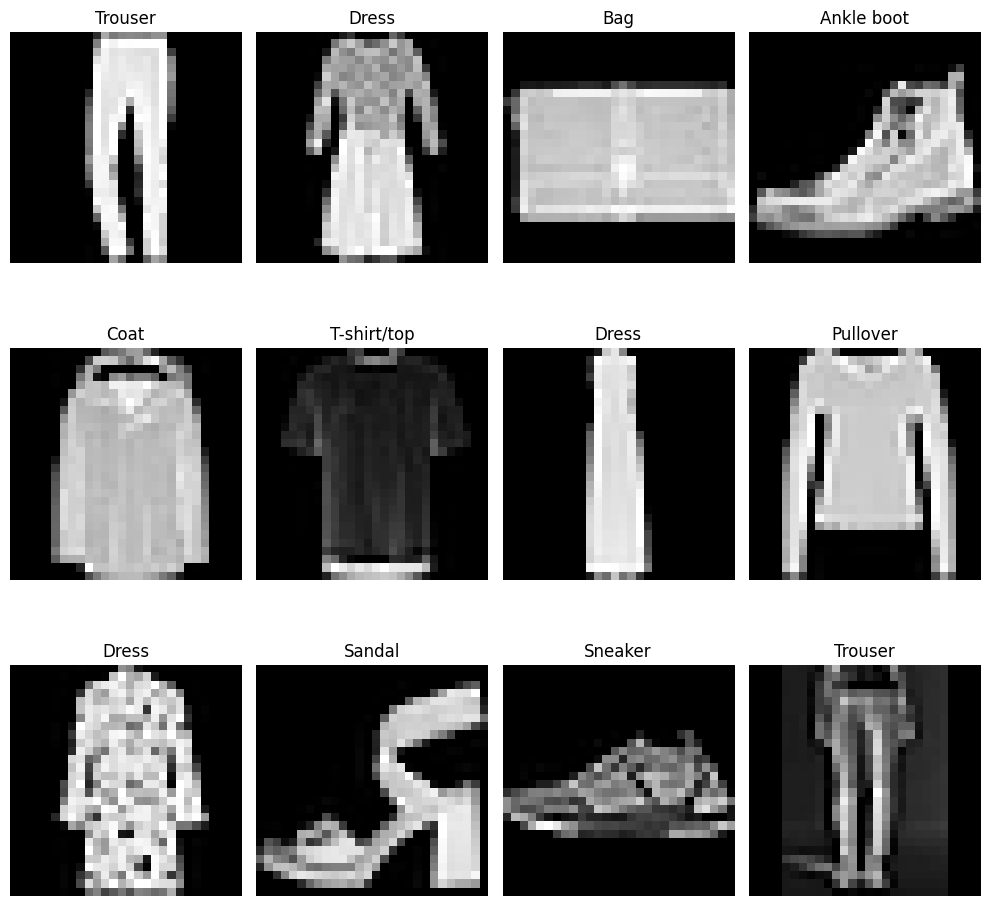

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    label = class_names[y_train[i]]
    plt.title(label)
plt.tight_layout()
plt.show()



In [ ]:
for i in range(10):
    label_num = y_train[i]
    label_name = class_names[label_num]
    print(f"Image {i} label: {label_num} -> {label_name}")


Image 0 label: 1 -> Trouser
Image 1 label: 3 -> Dress
Image 2 label: 8 -> Bag
Image 3 label: 9 -> Ankle boot
Image 4 label: 4 -> Coat
Image 5 label: 0 -> T-shirt/top
Image 6 label: 3 -> Dress
Image 7 label: 2 -> Pullover
Image 8 label: 3 -> Dress
Image 9 label: 5 -> Sandal


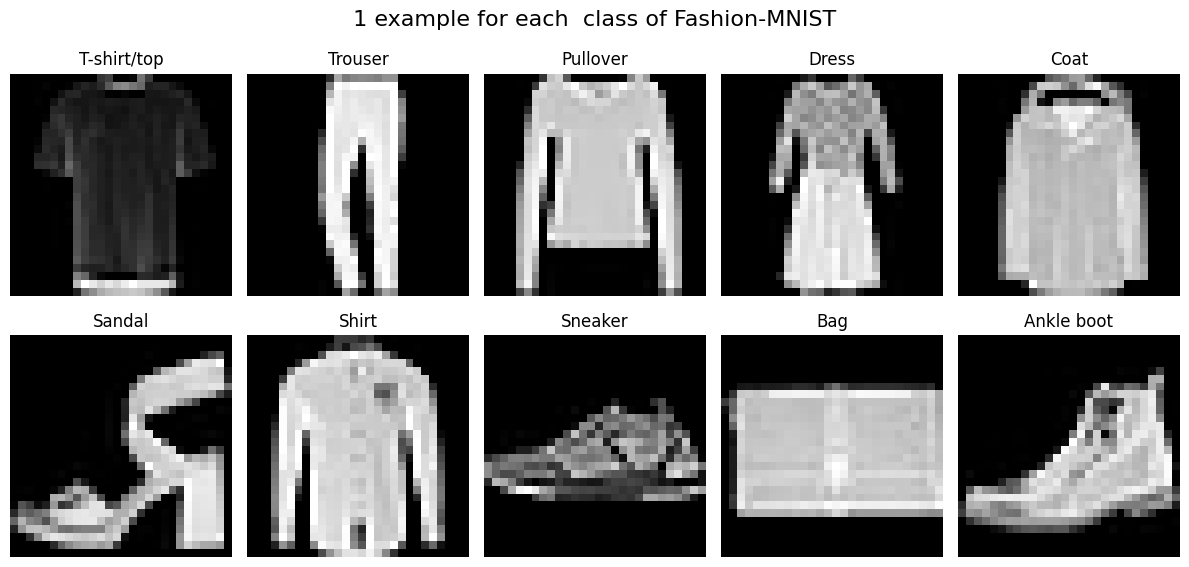

In [ ]:
plt.figure(figsize=(12,6))
for label_num in range(10):
    idx = np.where(y_train == label_num)[0][0]
    plt.subplot(2,5,label_num+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[label_num])
    plt.axis('off')
plt.suptitle(" 1 example for each  class of Fashion-MNIST ", fontsize=16)
plt.tight_layout()
plt.show()


#data preprocessing

In [ ]:
#Fashion-MNIST images have pixel values in the range 0–255. To optimize training in dense layers,
#it is necessary to scale these values to the 0–1 range.


#Normalize

# X_train = X_train / 255.0
# X_valid = X_valid / 255.0
# x_test = x_test / 255.0


#Dense layers accept 1D input vectors, but currently the images have a shape of (28, 28).
#Therefore, you need to reshape the images into 1D vectors before feeding them into the dense layers.
#Reshape

# X_train = X_train.reshape(-1, 28*28)   # (48000, 784)
# X_valid = X_valid.reshape(-1, 28*28)   # (12000, 784)
# x_test = x_test.reshape(-1, 28*28)     # (10000, 784)



#make model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True),
              metrics=["accuracy"])

model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7502 - loss: 0.7125 - val_accuracy: 0.8408 - val_loss: 0.4276
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8318 - loss: 0.4712 - val_accuracy: 0.8383 - val_loss: 0.4360
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8405 - loss: 0.4427 - val_accuracy: 0.8462 - val_loss: 0.4308
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8514 - loss: 0.4123 - val_accuracy: 0.8519 - val_loss: 0.4240
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8585 - loss: 0.3939 - val_accuracy: 0.8583 - val_loss: 0.3895


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,022 (2.08 MB)

 Trainable params: 272,060 (1.04 MB)

 Non-trainable params: 900 (3.52 KB)

 Optimizer params: 272,062 (1.04 MB)

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3955


[0.40048110485076904, 0.8540999889373779]

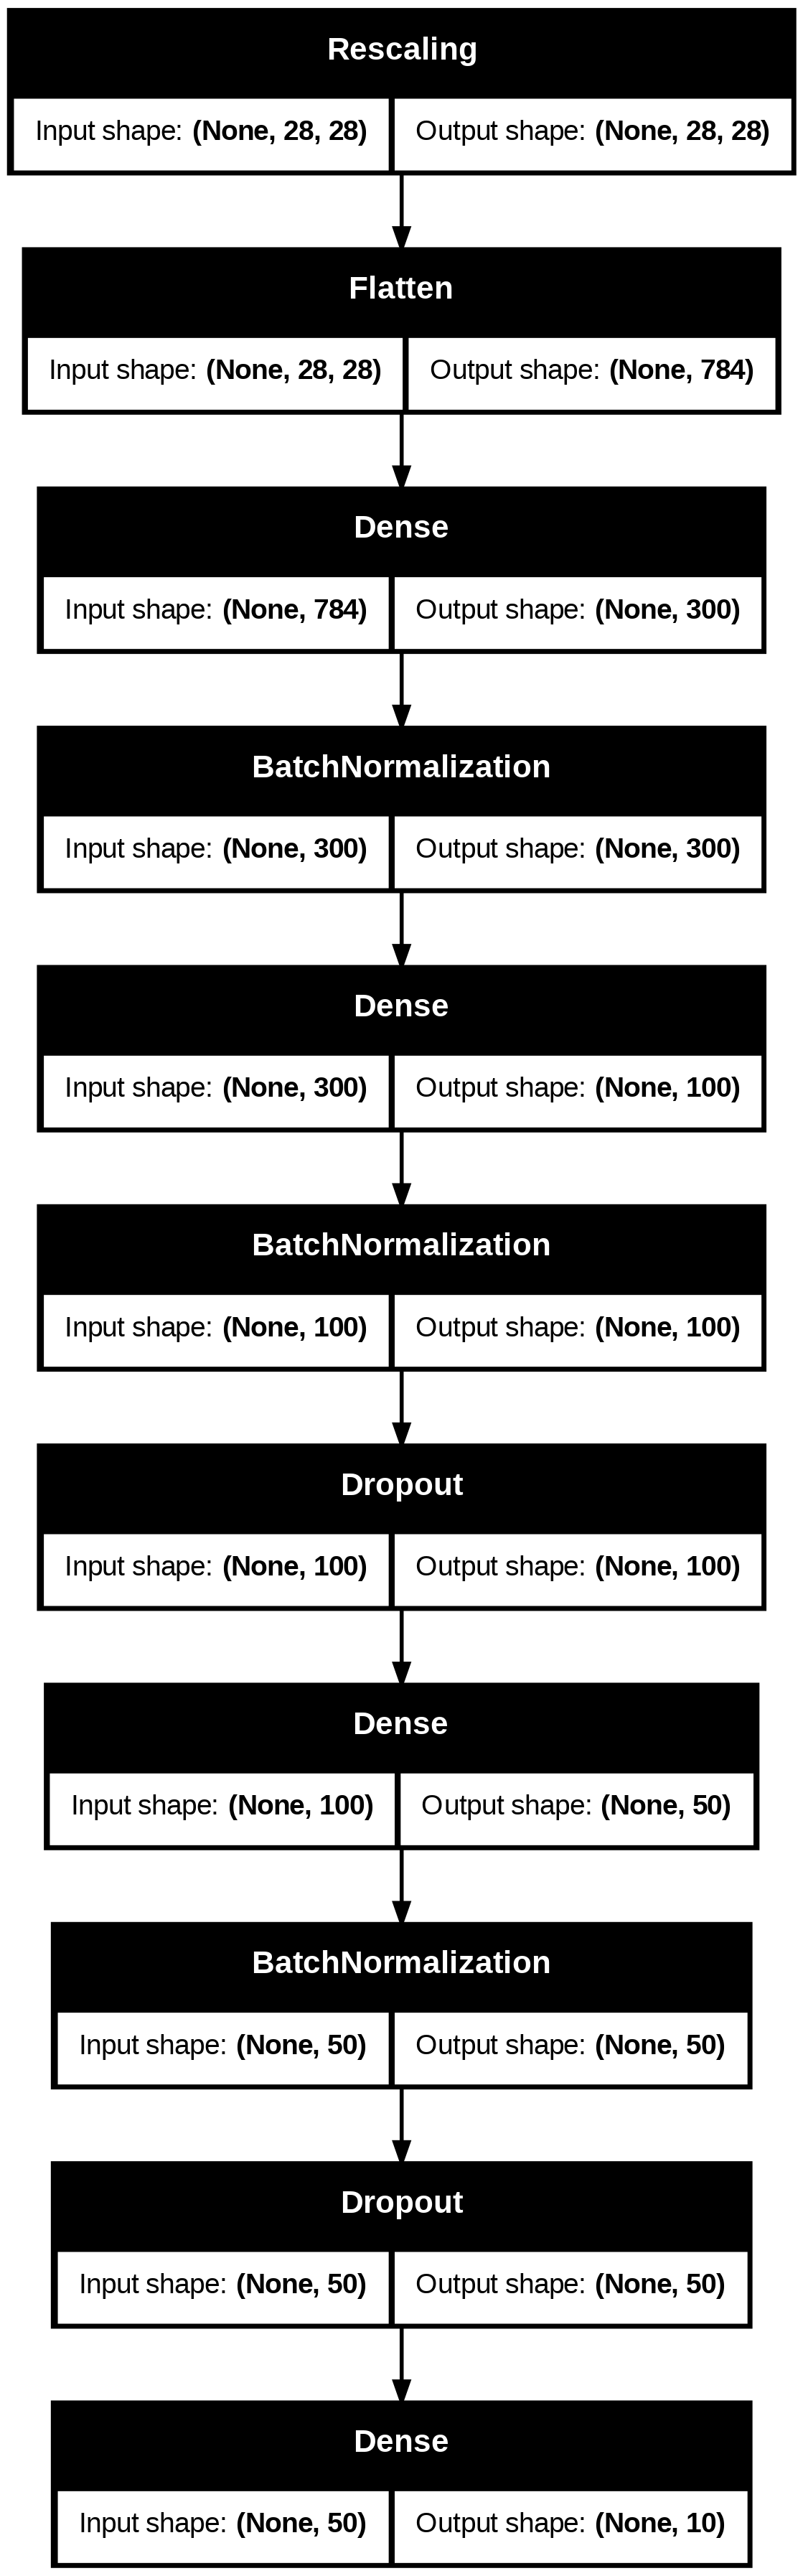

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


In [ ]:
#Extra kod


# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train)

# model = tf.keras.Sequential([
#     normalizer,
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])



#Error analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


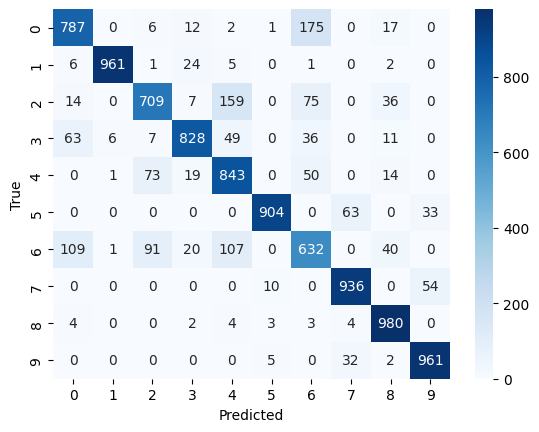

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.79      0.79      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.71      0.75      1000
       Dress       0.91      0.83      0.87      1000
        Coat       0.72      0.84      0.78      1000
      Sandal       0.98      0.90      0.94      1000
       Shirt       0.65      0.63      0.64      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.89      0.98      0.93      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=class_names))


In [ ]:
y_pred_probs = model.predict(x_test)  # Hər sinif üçün ehtimallar
y_pred_classes = y_pred_probs.argmax(axis=1)  # Ən yüksək ehtimallı sinif


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
import numpy as np

wrong_indices = np.where(y_pred_classes != y_test)[0]
print(f"Total wrong predictions: {len(wrong_indices)}")


Total wrong predictions: 1459


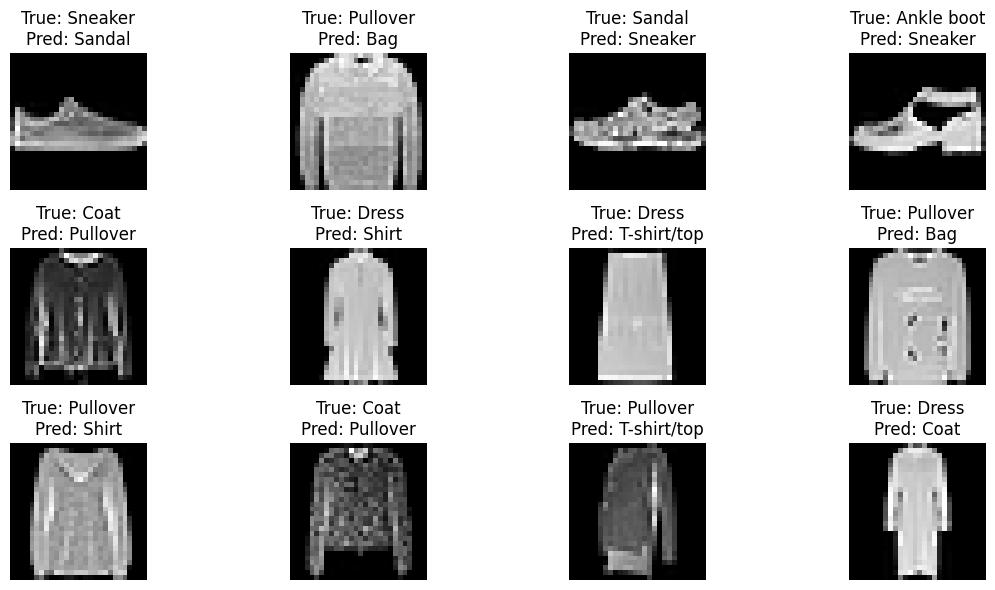

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, idx in enumerate(wrong_indices[:12]):  # İlk 12 səhv nümunə
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#PyTorch

#Info

The TensorFlow vs PyTorch debate is a classic, and both frameworks are powerful, but recently PyTorch has gained a lot of traction — especially in research and increasingly in industry.

PyTorch’s dynamic graph is intuitive and flexible. You write code more like standard Python, and the graph is built on-the-fly during execution.

TensorFlow 1.x relied heavily on static graphs which made debugging harder and code less straightforward.

This dynamic behavior makes PyTorch excellent for research and experimentation, where you often want to modify models quickly and debug interactively.

PyTorch was created by Meta (Facebook) and released in 2016.
TensorFlow was created by Google and released in 2015.

#Download dataset

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms


In TensorFlow, model.fit() automatically handles batching during training, while in PyTorch, the DataLoader takes care of batching the data before feeding it to the model during training.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 0-255 aralığındakı piksel dəyərlərini 0-1 aralığına çevirir
])

In [ ]:
#Download dataset (train və test)
full_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]


In [ ]:
#split train valid
train_size=int(0.8*len(full_dataset))
valid_size=len(full_dataset)-train_size
train_dataset,valid_dataset=random_split(full_dataset,[train_size,valid_size])
#"The random_split function takes the full_dataset and randomly divides it into train and validation subsets of specified sizes."

In [ ]:
train_size

48000

In [ ]:
valid_size

12000

In [ ]:
image, label = train_dataset[0]
print(image.shape)
print(label)


torch.Size([1, 28, 28])
6


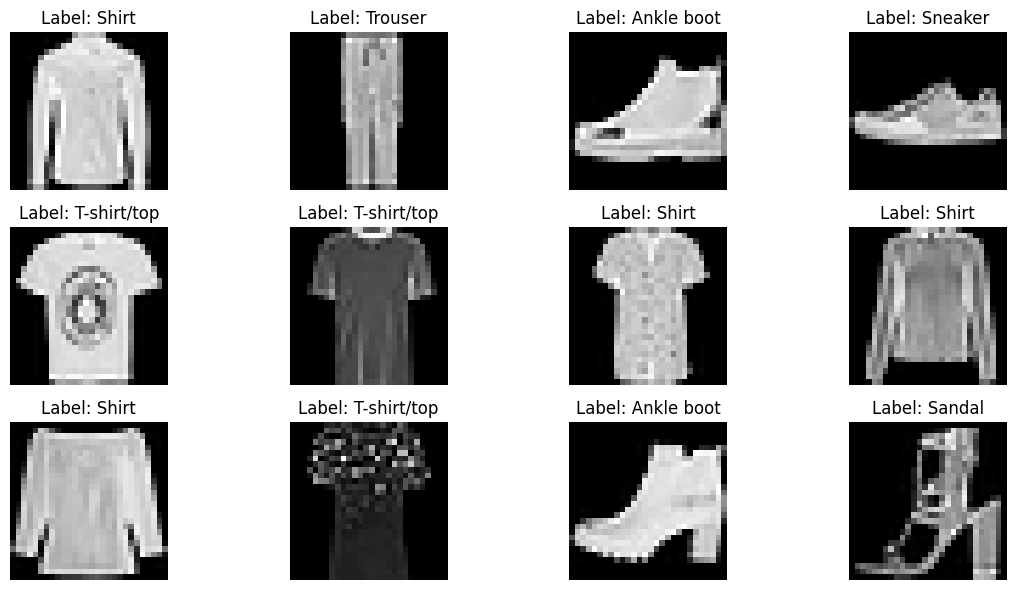

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(12):
    image, label = train_dataset[i]
    plt.subplot(3, 4, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#data loader

In [ ]:
from torch.utils.data import DataLoader
train_loader=DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
)
valid_loader=DataLoader(
    valid_dataset,
    batch_size=32,
    shuffle=False,
)
test_loader=DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
)

#make model

In [ ]:
from torch import nn
import torch.nn.functional as F

class FashionMNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten=nn.Flatten()
    self.dense_layers=nn.Linear(in_features=28*28,out_features=300)
    self.batch_norm1=nn.BatchNorm1d(300)

    self.dense_layers2=nn.Linear(in_features=300,out_features=100)
    self.batch_norm2=nn.BatchNorm1d(100)
    self.dropout=nn.Dropout(0.2)

    self.dense_layers3=nn.Linear(in_features=100,out_features=50)
    self.batch_norm3=nn.BatchNorm1d(50)
    self.dropout2=nn.Dropout(0.2)

    self.output_layer=nn.Linear(in_features=50,out_features=10)

  def forward(self, x):
      x = self.flatten(x)

      x = self.dense_layers(x)
      x = F.relu(x)
      x = self.batch_norm1(x)

      x = self.dense_layers2(x)
      x = F.relu(x)
      x = self.batch_norm2(x)
      x = self.dropout(x)

      x = self.dense_layers3(x)
      x = F.relu(x)
      x = self.batch_norm3(x)
      x = self.dropout2(x)

      x = self.output_layer(x)
      return x



✅ Rescaling: transforms.ToTensor() bunu artıq edir (0-255 → 0-1), ayrıca qat lazım deyil.

✅ Flatten: PyTorch-da nn.Flatten() ilə eynidir.

✅ Dense layers: PyTorch-da nn.Linear.

✅ Activation: F.relu() və ya nn.ReLU().

✅ BatchNormalization: nn.BatchNorm1d.

✅ Dropout: nn.Dropout.

✅ Softmax: istifadə etmirik, çünki CrossEntropyLoss daxili LogSoftmax tətbiq edi

✅ torch.nn.functional modulunda aktivasiya funksiyaları, loss funksiyaları və bəzi qatların funksional ekvivalentləri var.

In [ ]:
#Dense → BatchNorm → ReLU → Dropout


In [ ]:
model = FashionMNISTModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


FashionMNISTModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense_layers): Linear(in_features=784, out_features=300, bias=True)
  (batch_norm1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense_layers2): Linear(in_features=300, out_features=100, bias=True)
  (batch_norm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (dense_layers3): Linear(in_features=100, out_features=50, bias=True)
  (batch_norm3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
#Optimizer
optimizer=torch.optim.SGD(model.parameters(),  lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
#loss
loss_fn=nn.CrossEntropyLoss()

In [ ]:
#accelerate
from accelerate import Accelerator
accelerator=Accelerator()
model,optimizer,loss_fn,train_loader,valid_loader,test_loader=accelerator.prepare(
    model,optimizer,loss_fn,train_loader,valid_loader,test_loader
)

In [ ]:
#scheduler
import torch.optim.lr_scheduler as lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
#custom loop
from tqdm.auto import tqdm
num_epochs=5
num_training_steps=len(train_loader)*num_epochs

progress_bar=tqdm(range(num_training_steps))

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
      images,labels=batch
      outputs=model(images)

      loss=loss_fn(outputs,labels)
      accelerator.backward(loss)

      optimizer.step()
      optimizer.zero_grad()

      progress_bar.update(1)

    scheduler.step()

    #evaluation
    model.eval()
    all_preds=[]
    all_labels=[]
    for batch in valid_loader:
      with torch.no_grad():
        images,labels=batch
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        _,preds=torch.max(outputs,1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    accuracy=np.mean(np.array(all_preds)==np.array(all_labels))
    print(f"Epoch {epoch+1} validation accuracy: {accuracy:.4f}")






  0%|          | 0/7500 [00:00<?, ?it/s]

Epoch 1 validation accuracy: 0.8462
Epoch 2 validation accuracy: 0.8567
Epoch 3 validation accuracy: 0.8594
Epoch 4 validation accuracy: 0.8595
Epoch 5 validation accuracy: 0.8701


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.8615


In [ ]:
print("Initial batch loss:")
model.train()
for batch in train_loader:
    images, labels = batch
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    print(loss.item())
    break

Initial batch loss:
0.7347575426101685


#CNN model

In [ ]:
from torch import nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 28x28x1 → 28x28x32 → 14x14x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        # 14x14x32 → 14x14x64 → 7x7x64
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        # Fully Connected Layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*7*7, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

        # Weight Initialization for stable learning (like 'he_normal')
        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool(x)
        x = self.dropout2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(self.bn3(x))
        x = self.dropout3(x)
        x = self.fc2(x)
        return x







In [ ]:
cnn_model=CNNModel()
cnn_model.to(device)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
loss_fn = nn.CrossEntropyLoss()


In [ ]:
from accelerate import Accelerator
accelerator = Accelerator()

cnn_model, optimizer, loss_fn, train_loader, valid_loader, test_loader = accelerator.prepare(
    cnn_model, optimizer, loss_fn, train_loader, valid_loader, test_loader
)


In [ ]:
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
from tqdm.auto import tqdm
num_epochs = 5
num_training_steps = len(train_loader) * num_epochs
progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):
    cnn_model.train()
    for batch in train_loader:
        images, labels = batch


        outputs = cnn_model(images)
        loss = loss_fn(outputs, labels)

        accelerator.backward(loss)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        progress_bar.update(1)

    # Evaluation
    cnn_model.eval()
    all_preds, all_labels = [], []
    for batch in valid_loader:
        with torch.no_grad():
            images, labels = batch
            images, labels = images.to(accelerator.device), labels.to(accelerator.device)
            outputs = cnn_model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
    print(f"Epoch {epoch + 1} validation accuracy: {accuracy:.4f}")


  0%|          | 0/7500 [00:00<?, ?it/s]

Epoch 1 validation accuracy: 0.8688
Epoch 2 validation accuracy: 0.8825
Epoch 3 validation accuracy: 0.9026
Epoch 4 validation accuracy: 0.9017
Epoch 5 validation accuracy: 0.8894


In [ ]:
cnn_model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(accelerator.device), labels.to(accelerator.device)
        outputs = cnn_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.8841
